# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [26]:
import pydriller, datetime, re, pandas as pd, seaborn as sns
from tqdm import tqdm

In [14]:
cnt = 0
data = []
for commit in pydriller.Repository('transformers/').traverse_commits():
    if commit.author_date.date() >= datetime.date(2023, 1, 1):
        if re.search(r'(fix|bug|error|issue)', commit.msg, re.IGNORECASE):
            data.append({'hash': commit.hash, 'author_date': commit.author_date.date(), 'year_month': commit.author_date.date().strftime('%Y-%m')})
            cnt += 1
            #print('author date {}, message {}'.format(commit.author_date.date(), commit.msg))
            #print('hash {}, author date {}'.format(commit.hash, commit.author_date.date()))
            print('hash {}, author date {}'.format(commit.hash, commit.author_date.date()))
df = pd.DataFrame(data)
print(f'Iterated over {cnt} commits total.')
print(data)

hash a3e8d3cb1c0ce87c4e5858ab1c69ea92db360d47, author date 2023-01-03
hash 367fdf3330121a075c06d796bb95dfb1c69c65e4, author date 2023-01-03
hash 305f41e4dea99d9fdc212287263b3748aacc63d3, author date 2023-01-03
hash 9c6f7485a6ab2364f04df5893ab0e09f3c889b5d, author date 2023-01-03
hash 9c9fe89f84f7aa8ec29f19c39a1bf7f1bca82fc3, author date 2023-01-03
hash a9653400d3fac5b316429f641ae61846ae024cc7, author date 2023-01-03
hash 7b0727a4015a7a0fff8bbe3a86acd499ad5880b6, author date 2023-01-03
hash 8f09dd89f62c488f963a635283ce645ea83f522d, author date 2023-01-03
hash e901914da7ec8ac106999526f8a46db4f70c2e4e, author date 2023-01-03
hash cd918492c694bcf4fe8f5ca403f00d1d40ae46ac, author date 2023-01-03
hash 45da7cec5aa1b1bf1031af9caa9085e95e262e11, author date 2023-01-03
hash ce85686a1f425c8e60d9104522d8626395dd507d, author date 2023-01-04
hash b493fee95876e272100bc1d99521df08e91bb9ce, author date 2023-01-04
hash f9e977be70ad52a5321e86c21871fa3979160cc6, author date 2023-01-04
hash 292acd71d6d5305

Text(0, 0.5, 'Number of Commits Containing Defect Keywords')

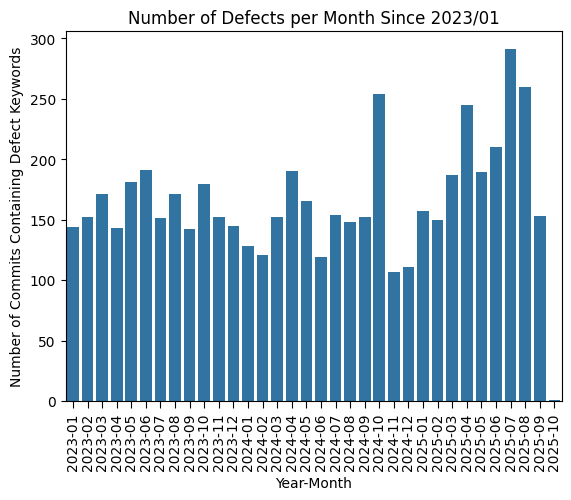

In [ ]:
ax = sns.countplot(x=df.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Defects per Month Since 2023/01')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect Keywords', fontsize=10)

#### Calculate and plot the total number of defects per month. Why do you think the number of defects dropped sharply in October 2025?
The plot shows the number of commits that contained the keywords "bug", "fix", "error" or "issue" per month. Technically, this does not directly represent the number of defects, since these commits usually represent a defect fix. 
The sharp decline of commits adressing defects in October 2025 is due to the overall low number of commits in this month (only 2).

In [23]:
cnt = 0
data = []
for commit in tqdm(pydriller.Repository('transformers/').traverse_commits()):
    if commit.author_date.date() >= datetime.date(2023, 1, 1):
        if re.search(r'(fix|bug|error|issue)', commit.msg, re.IGNORECASE):
            data.append({'hash': commit.hash, 'author_date': commit.author_date.date(), 'year_month': commit.author_date.date().strftime('%Y-%m'), 'modified_files': commit.modified_files})
            cnt += 1
            #print('author date {}, message {}'.format(commit.author_date.date(), commit.msg))
            #print('hash {}, author date {}'.format(commit.hash, commit.author_date.date()))
            print('hash {}, author date {}'.format(commit.hash, commit.author_date.date()))
df = pd.DataFrame(data)
print(f'Iterated over {cnt} commits total.')
print(data)

hash a3e8d3cb1c0ce87c4e5858ab1c69ea92db360d47, author date 2023-01-03
hash 367fdf3330121a075c06d796bb95dfb1c69c65e4, author date 2023-01-03
hash 305f41e4dea99d9fdc212287263b3748aacc63d3, author date 2023-01-03
hash 9c6f7485a6ab2364f04df5893ab0e09f3c889b5d, author date 2023-01-03
hash 9c9fe89f84f7aa8ec29f19c39a1bf7f1bca82fc3, author date 2023-01-03
hash a9653400d3fac5b316429f641ae61846ae024cc7, author date 2023-01-03
hash 7b0727a4015a7a0fff8bbe3a86acd499ad5880b6, author date 2023-01-03
hash 8f09dd89f62c488f963a635283ce645ea83f522d, author date 2023-01-03
hash e901914da7ec8ac106999526f8a46db4f70c2e4e, author date 2023-01-03
hash cd918492c694bcf4fe8f5ca403f00d1d40ae46ac, author date 2023-01-03
hash 45da7cec5aa1b1bf1031af9caa9085e95e262e11, author date 2023-01-03
hash ce85686a1f425c8e60d9104522d8626395dd507d, author date 2023-01-04
hash b493fee95876e272100bc1d99521df08e91bb9ce, author date 2023-01-04
hash f9e977be70ad52a5321e86c21871fa3979160cc6, author date 2023-01-04
hash 292acd71d6d5305

In [37]:
with open('data.txt', 'w') as f:
    f.write(str(data))

In [ ]:
files = {}
for entry in tqdm(data):
    for file in entry['modified_files']:
        filename = file.filename
        if filename not in files:
            files[filename] = 0
        files[filename] += 1

print("Top 2 modified files:")
top_2_files = sorted(files.items(), key=lambda x: x[1], reverse=True)[:5]
for file, count in top_2_files:
    print(f"{file}: {count} modifications")

5566


100%|██████████| 5566/5566 [00:00<00:00, 9541.57it/s] 

Top 2 modified files:
__init__.py: 1438 modifications
_toctree.yml: 483 modifications
modeling_utils.py: 367 modifications
trainer.py: 300 modifications
modeling_auto.py: 259 modifications


In [35]:
file_1_data = []
file_2_data = []
file_combined_data = []
file_1 = "modeling_utils.py"
file_2 = "trainer.py"
for entry in tqdm(data):
    for f in entry['modified_files']:
        if f.filename == "modeling_utils.py":
            file_1_data.append(entry)
        if f.filename == "trainer.py":
            file_2_data.append(entry)
        if f.filename == "modeling_utils.py" or f.filename == "trainer.py":
            file_combined_data.append(entry)

100%|██████████| 5566/5566 [00:02<00:00, 2679.60it/s]


Text(0, 0.5, 'Number of Commits Containing Defect Keywords')

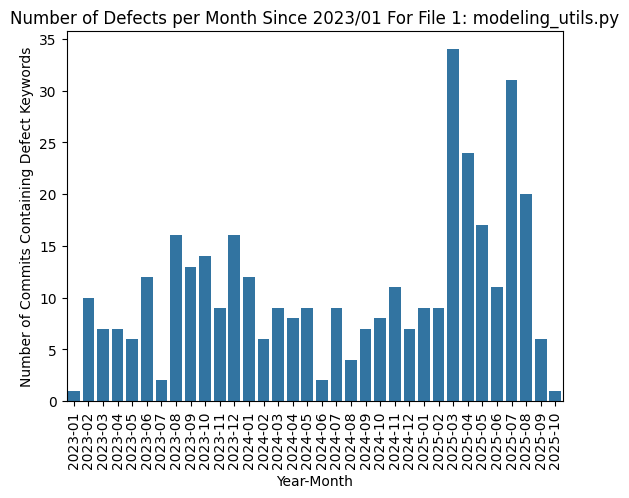

In [ ]:
df_file_1 = pd.DataFrame(file_1_data)
ax = sns.countplot(x=df_file_1.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Defects per Month Since 2023/01 For modeling_utils.py')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect Keywords', fontsize=10)

Text(0, 0.5, 'Number of Commits Containing Defect Keywords')

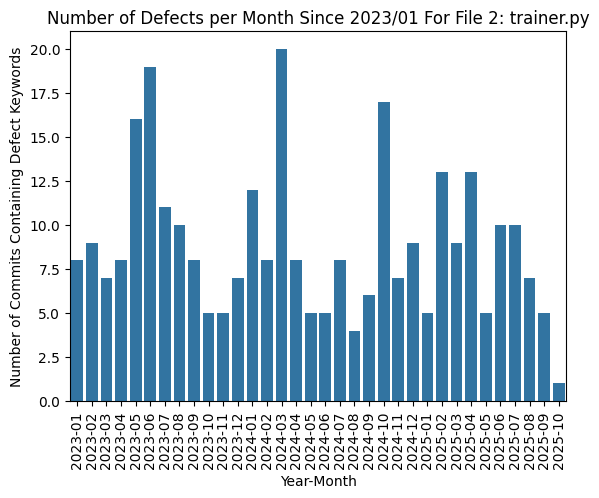

In [ ]:
df_file_2 = pd.DataFrame(file_2_data)
ax = sns.countplot(x=df_file_2.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Defects per Month Since 2023/01 For trainer.py')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect Keywords', fontsize=10)

Text(0, 0.5, 'Number of Commits Containing Defect Keywords')

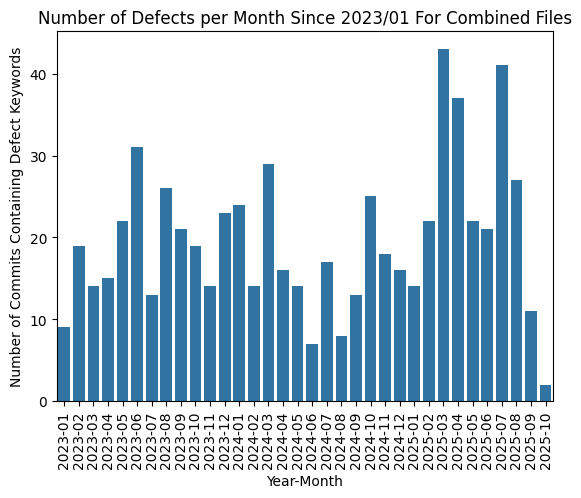

In [48]:
df_combined = pd.DataFrame(file_combined_data)
ax = sns.countplot(x=df_combined.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Defects per Month Since 2023/01 For Combined Files')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect Keywords', fontsize=10)

## Task 2

In [55]:
py_files = {}
for commit in tqdm(data):
    for modified_file in commit["modified_files"]:
        filename = modified_file.filename
        if filename.endswith(".py"):
            loc = modified_file.nloc
            cc = modified_file.complexity
            py_files[filename] = {"loc": loc, "cc": cc}

  0%|          | 0/5566 [00:00<?, ?it/s]


BrokenPipeError: [Errno 32] Broken pipe

In [44]:
py_files = {}
for commit in tqdm(data):
    for modified_file in commit["modified_files"]:
        filename = modified_file.filename
        if filename.endswith(".py"):
            loc = modified_file.nloc
            cc = modified_file.complexity
            py_files[filename] = {"loc": loc, "cc": cc}

  0%|          | 0/5566 [00:00<?, ?it/s]


BrokenPipeError: [Errno 32] Broken pipe